## Lista 05 - Estimação Pontual e Intervalo de Confiança

## Simulado 05

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import integrate, special, stats
import seaborn as sns

#### Questão 1

In [2]:
df = pd.read_csv('Simulado Q1.csv')
df.head()

,x
0,0.193460
1,0.850971
2,0.409289
3,-0.945363
4,0.517830


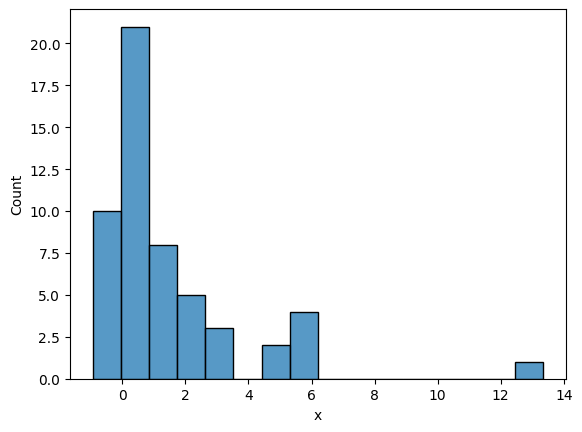

In [10]:
sns.histplot(data=df, x='x')
plt.show()

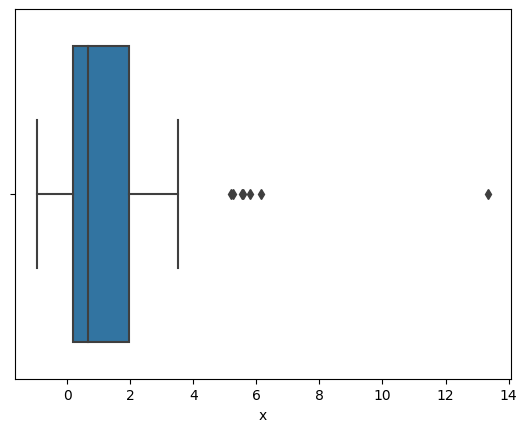

In [11]:
sns.boxplot(data=df, x='x')
plt.show()

In [22]:
p1 = df['x'].quantile(0.25)
p2 = df['x'].quantile(0.75)
print(p2-p1)

1.7810120887164722


In [14]:
m = np.mean(df['x'])
print(m)

1.5177255636393752


#### Questão 2

Máxima Verossimilhança, $\overline{X} = mean(X) = sum(x_i)/N$

$$
\theta e^{\theta x}: \theta_s = 1/\overline{X}
$$

$$
Poisson(\lambda) = \frac{e^{-\lambda}\lambda^x}{x!}: \lambda_s = \overline{X}
$$

$$
N(\mu, \sigma^2): \mu_s = \overline{X}
$$

$$
Binomial(n,p): p_s = \overline{X}
$$

Estimador geral não enviesado:

$$
\sigma^2_s = \frac{n}{n-1} (E[X^2] - E[\overline{X}^2]) = \frac{n}{n-1} \sigma^2_{amostral}
$$

In [23]:
X = [14,4,8,10,15,15,11,18,6,14,8,11,10,14,12]
l = np.mean(X)
print(l)

11.333333333333334


In [27]:
n = 15
""" 
  Para intervalo de 90% de confiança

  1-a = 0.90  => a = 0.10  => a/2 = 0.05

  Seja f a função desejada de aproximação ou da propria distribuição
  z_{a/2} = percentPoint(f, -inf, a/2) = cumSum^{-1}(f, -inf, a/2)

  otimista
  E = z_{a/2} sigma / sqrt{n}

  conservativa
  E = z_{a/2} 1 / (2 sqrt{n})
"""

q = stats.t.ppf(0.05, n-1)
s2 = np.var(X) * (n/(n-1))
E = q * np.sqrt(s2) / np.sqrt(n)
IC = [l-E, l+E]
print(IC)

[13.057916048082578, 9.60875061858409]


#### Questão 3

In [32]:
n = 72
l = 5
s2 = l**2

shiftLimit = (371 - n * l) / (np.sqrt(n * s2))

p = 1 - stats.norm.cdf(shiftLimit)
print(p)

0.3977125031952966


#### Questão 4

In [39]:
n = 107
boas = 91
m = boas/n

q = 1 / np.sqrt(4 * n)
za = stats.norm.ppf(0.01)
E = za * q

IC = [m-E, m+E]
print(IC)

[0.9629155585220804, 0.7380190209171719]


#### Questão 5

In [42]:
l = 10
p = 1 - stats.expon.cdf(l, scale=l)
print(p ** 3)

0.04978706836786395


### Questão 6

In [43]:
s = 2500
n = 22
m = 57812
a = 0.94
a2 = (1 - a)/2

z = stats.norm.ppf(a2)
E = z * (s / np.sqrt(n))

IC = [m - E, m + E]
print(IC)


[58814.46636143725, 56809.53363856275]


## Lista 05